<img src="img/TJI_logo_whitebg_440x220.jpg" alt="drawing" style="width: 220px;float: right"/>

# Analysis: Texas law enforcement population
---

## Overview

A high-level look at the population of sworn officers in Texas law enforcement.

## Summary of findings
* There are about 75,000 sworn police officers in Texas.
* About 60% are white, 30% hispanic, 10% black.
* About 90% are men.
* While women are only 10% of officers at large, they comprise ~15% of younger officers, ~20% of black officers, and ~15% of hispanic officers.
* High-population counties have disproportionately many minority officers (especially black -- but also hispanic, female, and other non-white races).

## Datasets used:
* `tji/auxiliary-datasets/list_of_texas_officers`
* `tji/auxiliary-datasets/census_data_by_county`

##### Author: Everett Wetchler (everett.wetchler@gmail.com)

## [ Setup and load data ]

In [1]:
from lib import PlotSaver, percentify_x, percentify_y

plotsaver = PlotSaver('../plots/', 'officer_population_')

Removing 8 past plots


/Users/everettwetchler/.virtualenvs/tji-analysis/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Everett Wetchler 2018-05-24 13:46:11 CDT

numpy 1.14.3
pandas 0.20.1
matplotlib 2.2.0
seaborn 0.7.1
datadotworld 1.6.0
Git hash: 20251e6910494b3fa13a9f8e2e3f9bcecef4682f
watermark 1.5.0


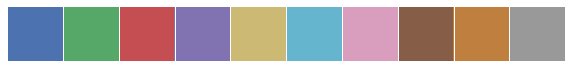

In [2]:
####################################################
# Boilerplate import/setup code for general analysis
# everett.wetchler@gmail.com
####################################################

import datetime as dt
import os
import random

import datadotworld as dw
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Jupyter setup
%matplotlib inline

## Graphical setup
mpl.rcParams.update({
  'font.size': 14,
  'axes.titlesize': 'x-large',
  'axes.labelsize': 'large',
  'xtick.labelsize': 'medium',
  'ytick.labelsize': 'medium',
  'legend.fancybox': True,
  'legend.fontsize': 'medium',
  'legend.frameon': True,
  'legend.framealpha': 0.7,
  'figure.figsize': ['9', '6'],
})

# Set up a longer default color palette of very different
# colors for plotting categorical data.
set1 = sns.color_palette('Set1', 9, desat=.5)
super_palette = sns.color_palette('deep', 6) + [set1[7], set1[6], set1[4], set1[8]]
sns.set_palette(super_palette)
sns.palplot(sns.color_palette())

# It's useful to have some named colors handy
(SNS_BLUE, SNS_GREEN, SNS_RED,
 SNS_PURPLE, SNS_YELLOW, SNS_CYAN,
 SNS_PINK, SNS_BROWN, SNS_ORANGE,
 SNS_GRAY) = super_palette

# Watermark extension to print version/system information
# Flags:
# -a [author] -d (date) -t (time) -z (timezone) -r (repo)
# -g (git hash) -w (watermark version) -p [packages] (package info)
%load_ext watermark
%watermark -a 'Everett Wetchler' -g -d -t -z -w -p numpy,pandas,matplotlib,seaborn,datadotworld

####################################################
# END Boilerplate
####################################################

In [3]:
plotsaver = PlotSaver('../plots/', 'officer_population_')

Removing 0 past plots


In [4]:
def long_gender(g):
    if pd.isnull(g):
        return g
    return 'MALE' if g == 'M' else 'FEMALE'

### Load and merge data

In [5]:
dataset = dw.load_dataset('tji/auxiliary-datasets', force_update=True)
officer_info = dataset.dataframes['list_of_texas_officers']
officer_info['gender'] = officer_info['gender'].apply(long_gender)
officer_info['highest_cert_abbr'] = officer_info['highest_cert'].apply(lambda cert: cert.split(' PEACE OFFICER')[0])
officer_info['service_years_int_capped'] = officer_info.service_time.astype(int).apply(lambda y: min(y, 50))

In [6]:
dataset = dw.load_dataset('tji/auxiliary-datasets', force_update=True)
census = dataset.dataframes['census_data_by_county']
county_populations = census[census['metric_description'] == 'Population estimates, July 1, 2016,  (V2016)'].iloc[0]
county_populations.drop([c for c in county_populations.index if c.startswith('metric')], inplace=True)
county_populations = dict((c.upper(), count) for c, count in county_populations.astype(int).items())

def pop_category(p):
    if pd.isnull(p):
        return p
    elif p < 1e4:
        return 'XSMALL\n(< 10k)'
    elif p < 1e5:
        return 'SMALL\n(< 100k)'
    elif p < 1e6:
        return 'MEDIUM\n(100k-1MM)'
    else:
        return 'LARGE\n(1MM+)'

officer_info['county_size'] = officer_info.current_agency_county.apply(
    lambda c: pop_category(county_populations.get(c, None)))

officer_info.sample(10)

name_full name_first name_middle   name_last name_suffix  \
34036       FELIPE VASQUEZ     FELIPE         NaN     VASQUEZ         NaN   
62323  TEDDIE D WILLIAMSON     TEDDIE           D  WILLIAMSON         NaN   
37403         MARCO A RIOS      MARCO           A        RIOS         NaN   
48242         ADAM E NOLAN       ADAM           E       NOLAN         NaN   
43619  GILBERTO M VAZALDUA   GILBERTO           M    VAZALDUA         NaN   
74043       DANIEL C BROWN     DANIEL           C       BROWN         NaN   
60829       LYNDON J SMITH     LYNDON           J       SMITH         NaN   
26916      MARCO A RAMONDA      MARCO           A     RAMONDA         NaN   
46215         PAUL A BALES       PAUL           A       BALES         NaN   
2328     ANTHONY C DAGGETT    ANTHONY           C     DAGGETT         NaN   

      gender      race age_range               current_agency  \
34036   MALE  HISPANIC       51+      HOUSTON ISD POLICE DEPT   
62323   MALE     BLACK       51+  TEXAS DEPT OF PUBLIC SAFETY   
37403   MALE  HISPANIC     41-50          HOUSTON POLICE DEPT   
48242   MALE  HISPANIC     31-40          LUBBOCK POLICE DEPT   
43619   MALE  HISPANIC     31-40            PHARR POLICE DEPT   
74043   MALE     WHITE     31-40        WALKER CO CONST PCT 3   
60829   MALE     WHITE     41-50  TEXAS DEPT OF PUBLIC SAFETY   
26916   MALE  HISPANIC     31-40            KEMAH POLICE DEPT   
46215   MALE     WHITE     41-50        RIO VISTA POLICE DEPT   
2328    MALE     WHITE     41-50     BEXAR CO SHERIFFS OFFICE   

      current_agency_county                highest_cert  highest_cert_int  \
34036                HARRIS        MASTER PEACE OFFICER                 4   
62323                 STATE        MASTER PEACE OFFICER                 4   
37403                HARRIS        MASTER PEACE OFFICER                 4   
48242               LUBBOCK         BASIC PEACE OFFICER                 1   
43619               HIDALGO      ADVANCED PEACE OFFICER                 3   
74043                WALKER  INTERMEDIATE PEACE OFFICER                 2   
60829                 STATE        MASTER PEACE OFFICER                 4   
26916             GALVESTON         BASIC PEACE OFFICER                 1   
46215               JOHNSON      ADVANCED PEACE OFFICER                 3   
2328                  BEXAR        MASTER PEACE OFFICER                 4   

       service_time highest_cert_abbr  service_years_int_capped  \
34036         26.33            MASTER                        26   
62323         35.83            MASTER                        35   
37403         23.92            MASTER                        23   
48242          1.83             BASIC                         1   
43619         17.00          ADVANCED                        17   
74043         10.50      INTERMEDIATE                        10   
60829         15.42            MASTER                        15   
26916         10.67             BASIC                        10   
46215         11.25          ADVANCED                        11   
2328          17.08            MASTER                        17   

              county_size  
34036       LARGE\n(1MM+)  
62323                None  
37403       LARGE\n(1MM+)  
48242  MEDIUM\n(100k-1MM)  
43619  MEDIUM\n(100k-1MM)  
74043     SMALL\n(< 100k)  
60829                None  
26916  MEDIUM\n(100k-1MM)  
46215  MEDIUM\n(100k-1MM)  
2328        LARGE\n(1MM+)

## [ Begin analysis ]

In [7]:
plot_order = ['age_range', 'race', 'gender', 'service_years_int_capped', 'county_size', 'highest_cert_abbr']
col_colors = {
    'gender': [SNS_RED, SNS_BLUE],
    'race': ['gray', SNS_YELLOW, SNS_BLUE, SNS_GREEN],
    'age_range': sns.color_palette('Blues_d', 4)[::-1],
    'county_size': sns.color_palette('Greens_d', 4)[::-1],
    'service_years_int_capped': [SNS_BLUE],
    'highest_cert_abbr': sns.color_palette()[:-1],
}
order = {
    'gender': ['FEMALE', 'MALE'],
    'race': ['WHITE', 'HISPANIC', 'BLACK', 'OTHER'],
    'age_range': ['21-30', '31-40', '41-50', '51+'],
    'county_size': ['XSMALL\n(< 10k)', 'SMALL\n(< 100k)', 'MEDIUM\n(100k-1MM)', 'LARGE\n(1MM+)'],
    'highest_cert_abbr': ['NONE', 'BASIC', 'INTERMEDIATE', 'ADVANCED', 'MASTER'],
}
col_printname = {
    'gender': 'Gender',
    'race': 'Race',
    'age_range': 'Age',
    'county_size': 'County Size',
    'service_years_int_capped': 'Service Time (years)',
    'highest_cert_abbr': 'Certification Level',
}
nostack = {'service_years_int_capped', 'highest_cert_abbr'}

def make_grid_plot(stack_col=None, alpha=0.8): 
    nrows = 3#2 if stack_col else 3
    fig, axes = plt.subplots(nrows, 2)
    axes = axes.flatten()

    fig.set_size_inches(18, 6 * nrows)
    if not stack_col:
        fig.suptitle("OVERVIEW - %s Texas police officers, as of May 2018" % "{:,}".format(len(officer_info)), fontsize=24)
    else:
        fig.suptitle("CROSSTAB - Texas officer demographics by " + col_printname[stack_col], fontsize=24)

    iax = 0
    for by_col in plot_order:
        if by_col == stack_col:
            continue
        ax = axes[iax]
        iax += 1
        if stack_col:
            vc = officer_info.groupby([by_col, stack_col]).size().unstack()
            vc = vc.div(vc.sum(axis=1), axis=0)
            vc = vc[order[stack_col]]
            color = col_colors[stack_col]
        else:
            vc = officer_info[by_col].value_counts(True)
            color = col_colors[by_col][::-1]

        if by_col == 'service_years_int_capped':
            vc = vc.sort_index()
            vc.plot(kind='bar', ax=ax, width=1, stacked=True, color=color, alpha=alpha)
            if stack_col:
                ax.set_ylim(0, 1.01)
                ax.set_yticks(np.arange(0, 1.01, .1))
            ax.set_xticklabels([(t.get_text() if int(t.get_text()) % 5 == 0 else '')
                                for t in ax.get_xticklabels()], rotation=0)
            ax.set_ylabel("Fraction of officers")
            ax.set_xlabel(col_printname[by_col])
            percentify_y(ax, decimals=0)
        else:
            vc = vc.loc[order[by_col]][::-1]
            vc.plot(kind='barh', ax=ax, width=.9, stacked=True, color=color, alpha=alpha)
            if stack_col:
                ax.set_xlim(0, 1.01)
                ax.set_xticks(np.arange(0, 1.01, .1))
            ax.set_xlabel("Fraction of officers")
            ax.set_ylabel(col_printname[by_col])
            percentify_x(ax, decimals=0)

        if stack_col:
            ax.set_title("%s distribution by %s" % (col_printname[stack_col], col_printname[by_col]))
            ax.legend()
        else:
            ax.set_title("By %s" % (col_printname[by_col]))
        plt.subplots_adjust(hspace=0.4, wspace=0.4, left=0.16)

    plotsaver.saveplot(fig, (stack_col or 'overview') + '_grid')

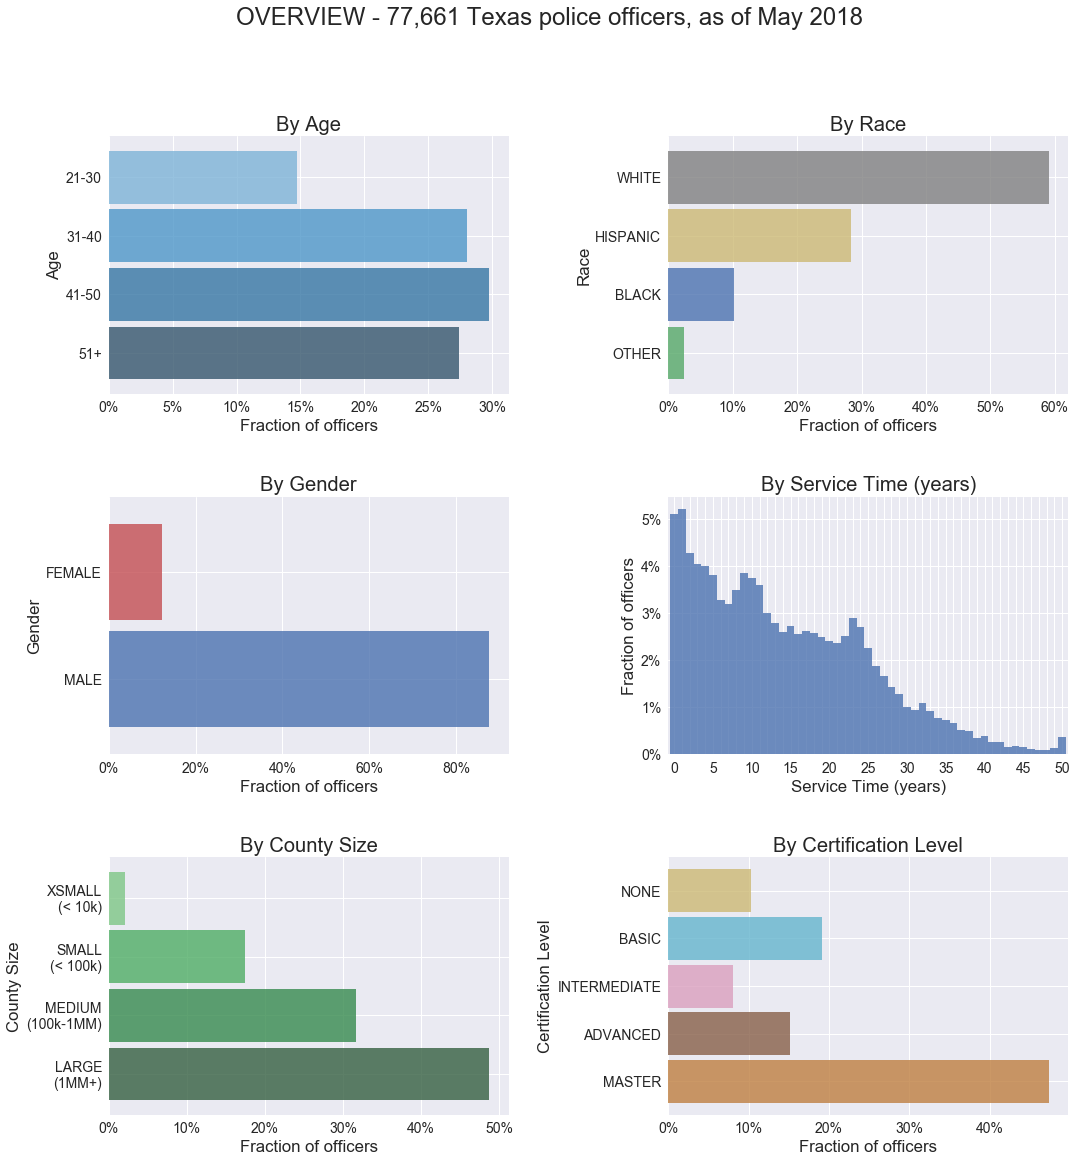

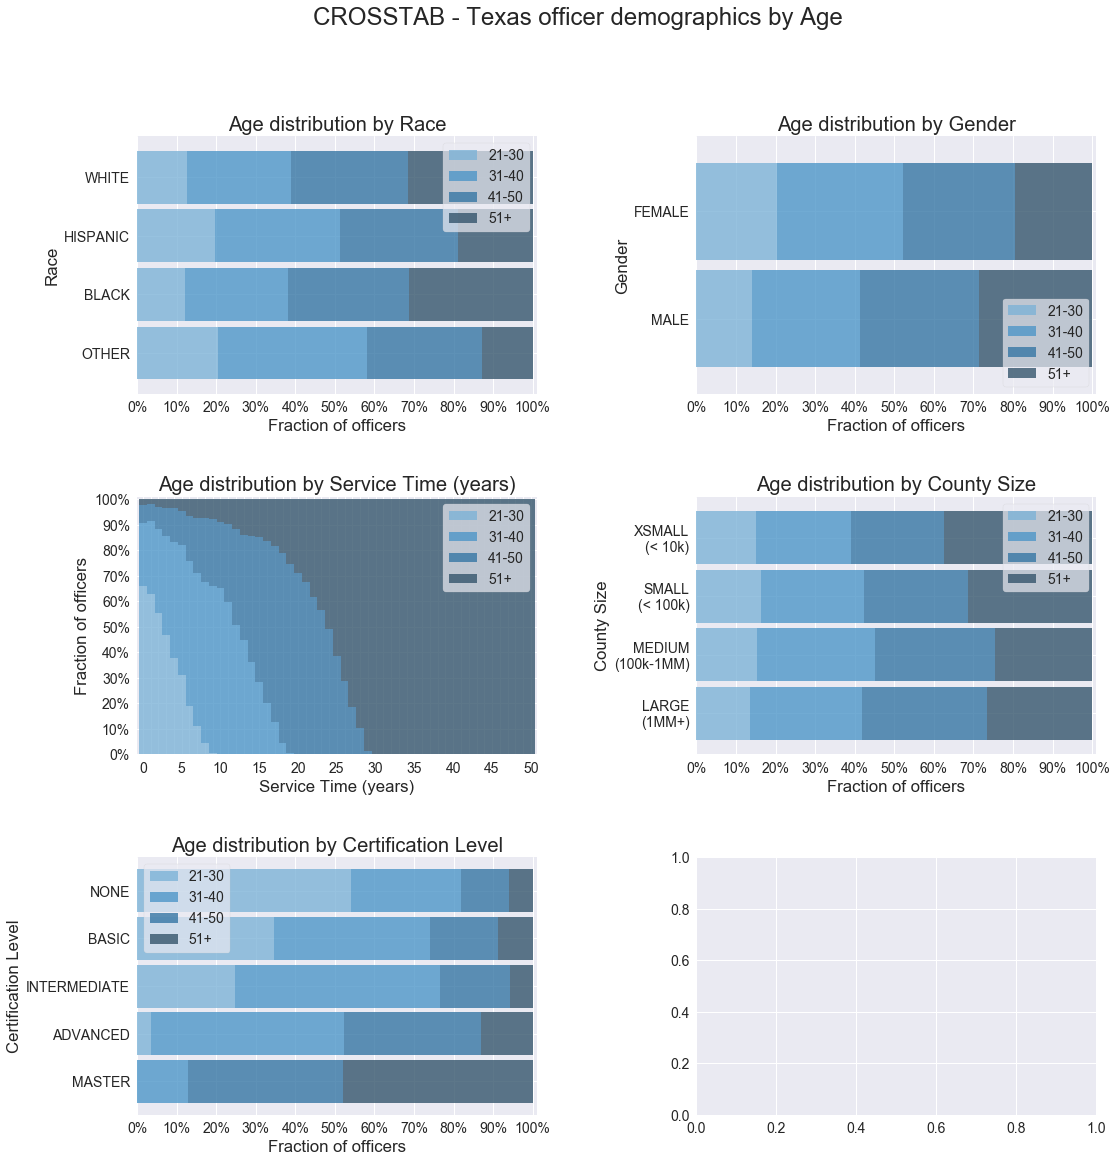

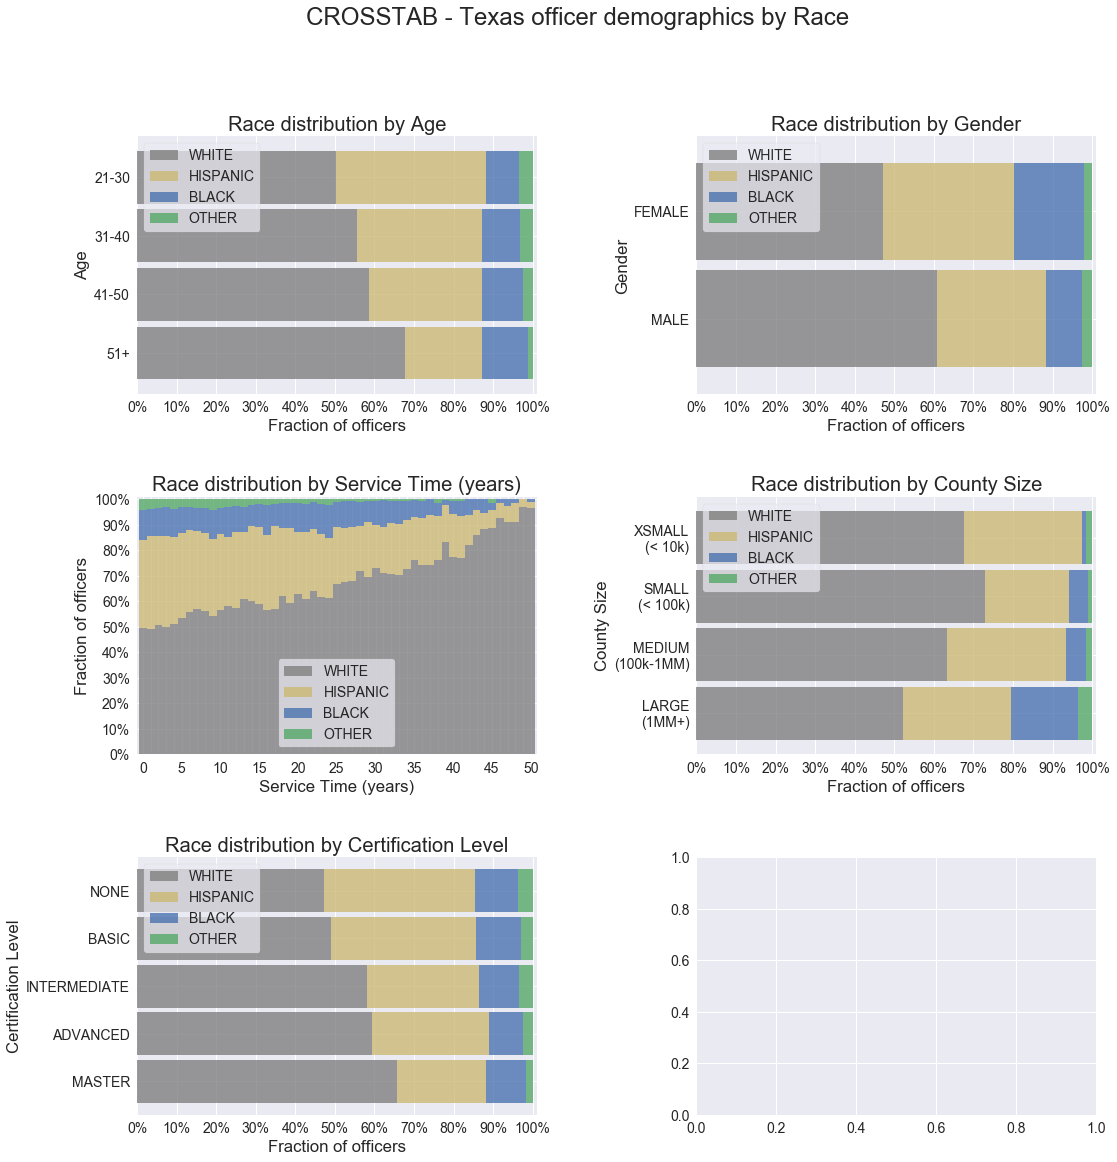

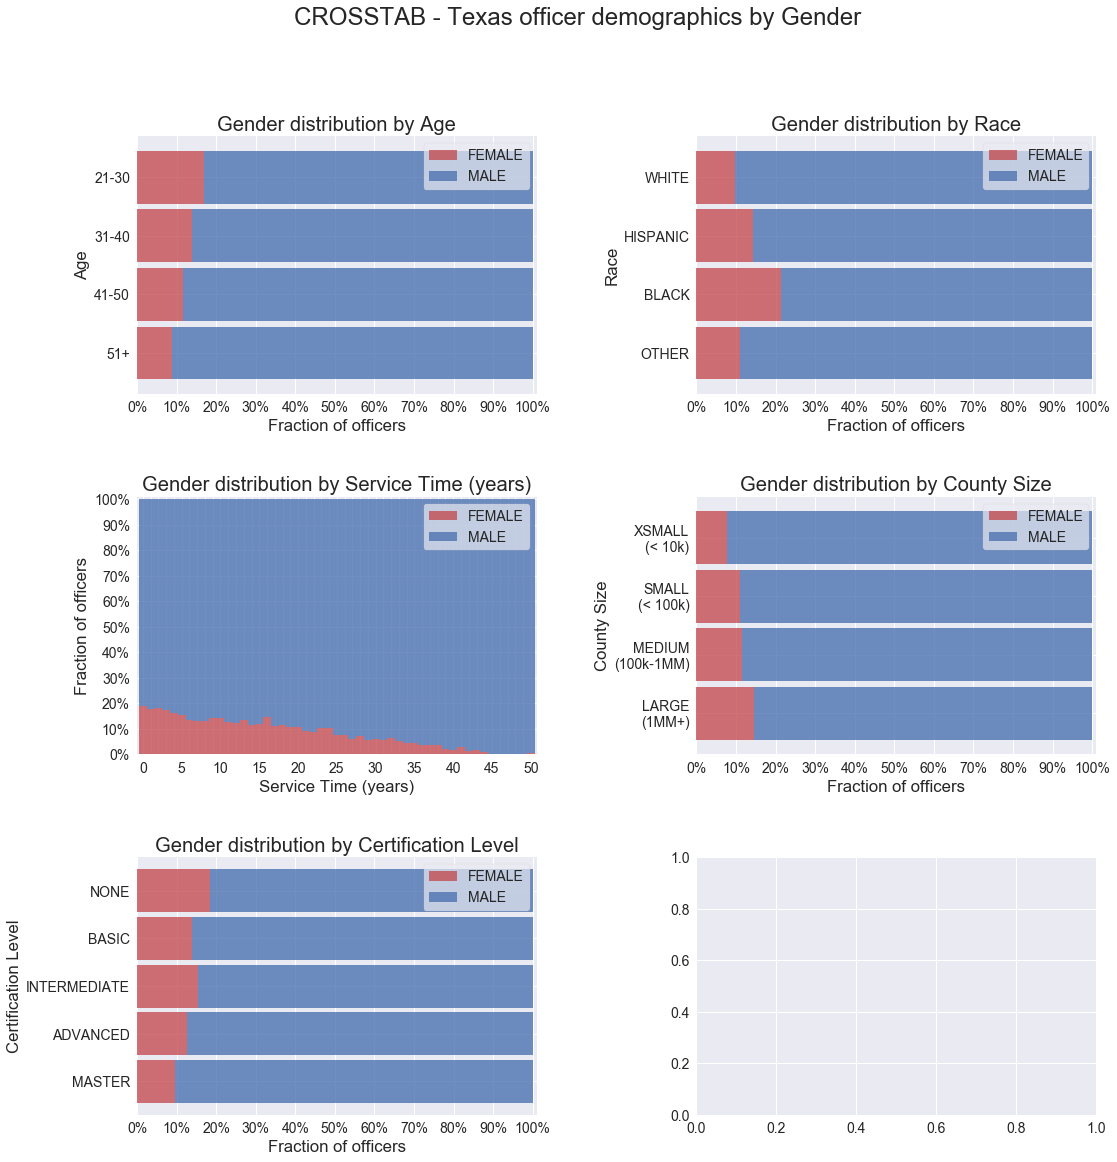

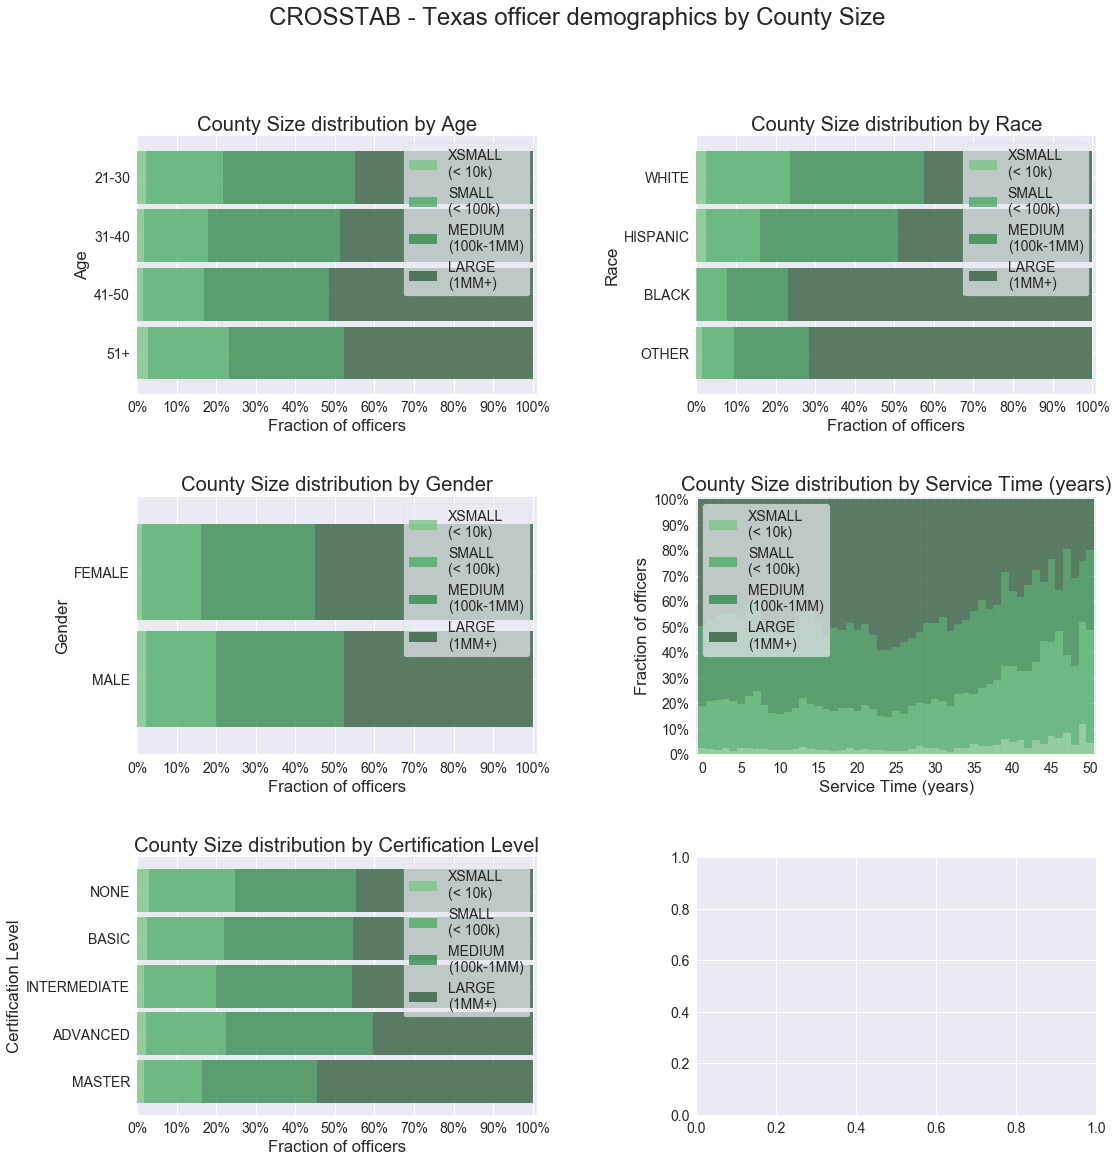

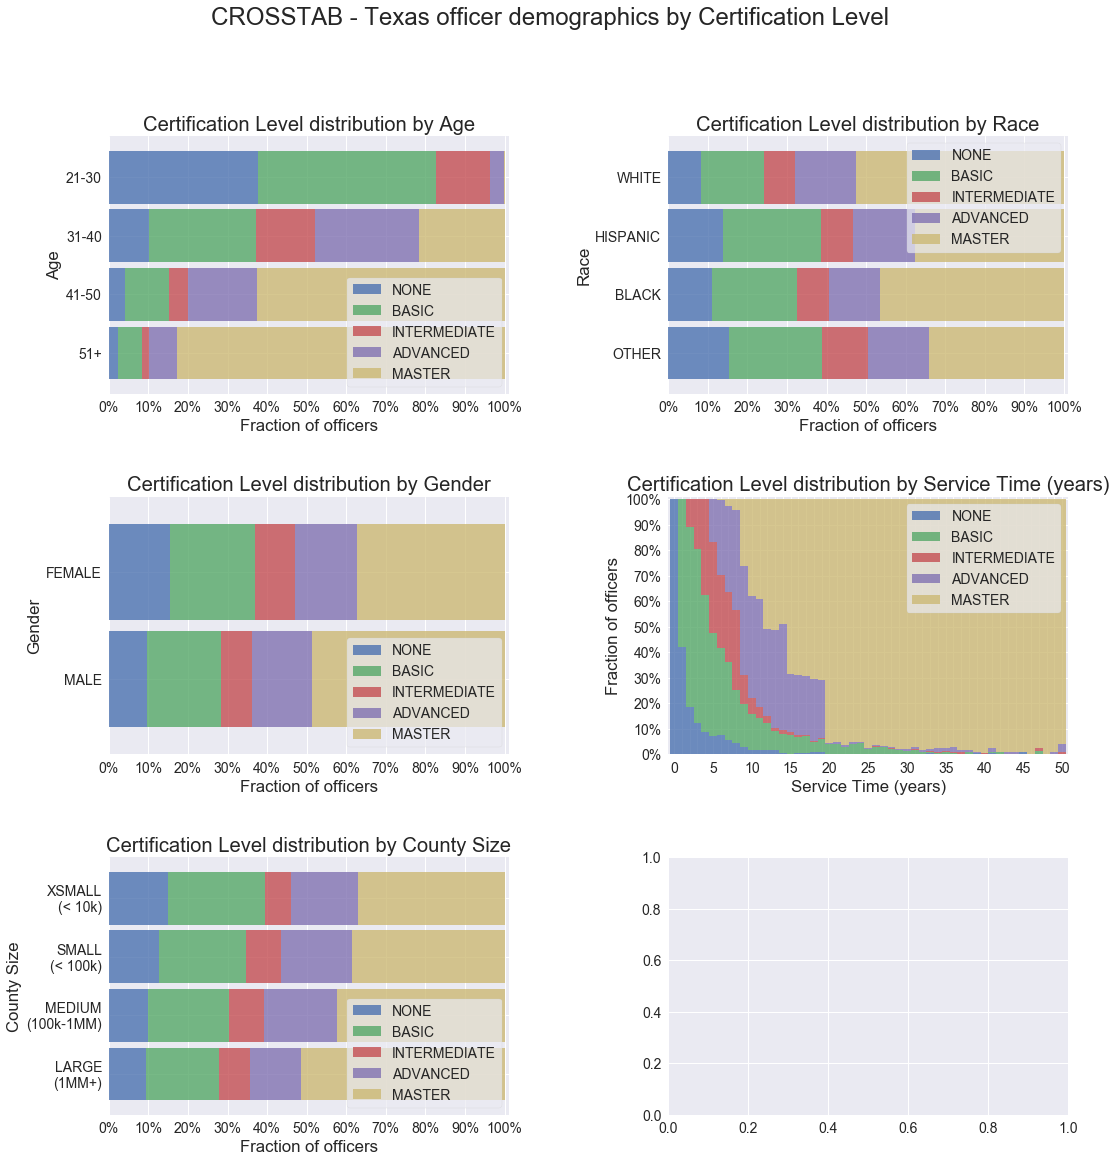

In [8]:
for by in [None] + plot_order:
    if by == 'service_years_int_capped':
        continue
    make_grid_plot(by)

## [ Another look at gender ]

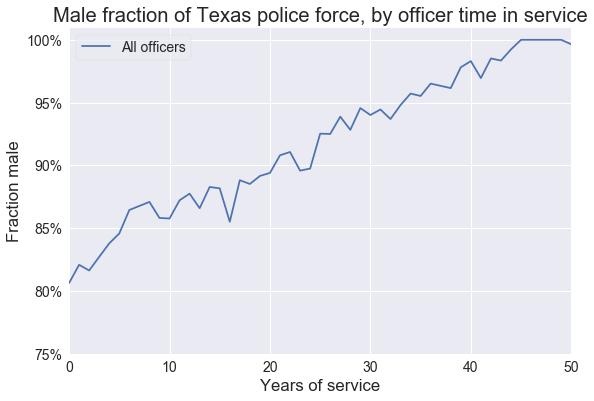

In [9]:
officer_info['is_male'] = officer_info.gender == 'MALE'
fig, ax = plt.subplots(1)
officer_info.groupby('service_years_int_capped')['is_male'].mean().plot(label='All officers')
ax.set_title('Male fraction of Texas police force, by officer time in service')
ax.set_xlabel('Years of service')
ax.set_ylabel('Fraction male')
ax.set_yticks(np.arange(.75, 1.01, .05))
percentify_y(ax, decimals=0)
ax.legend()
plotsaver.saveplot(fig, 'male_fraction_by_service_years')

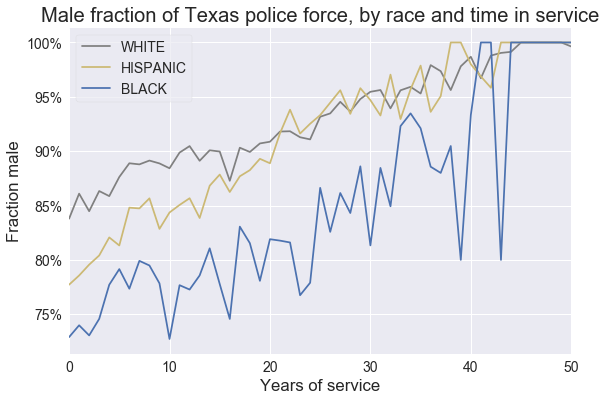

In [10]:
fig, ax = plt.subplots(1)
for race, color in zip(order['race'], col_colors['race']):
    if race == 'OTHER':
        continue
    frame = officer_info[officer_info.race == race]
    s = frame.groupby('service_years_int_capped')['is_male'].mean().sort_index()
    s.plot(kind='line', label=race, color=color)

percentify_y(ax, decimals=0)
ax.legend()
ax.set_title('Male fraction of Texas police force, by race and time in service')
ax.set_xlabel('Years of service')
ax.set_ylabel('Fraction male')
plotsaver.saveplot(fig, 'male_fraction_by_race_and_service_years')